# Funding Amount

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("startup_funding.csv")

df = data.copy()
counts = df['CityLocation'].value_counts()
df = df.dropna(subset = ["CityLocation"])

df["CityLocation"] = df["CityLocation"].replace(['Delhi', 'bangalore','Pune / US','Bangalore / SFO','New Delhi / US','Bangalore/ Bangkok','Mumbai / NY','New Delhi/ Houston','Bangalore / Palo Alto','Gurgaon / SFO','Mumbai / UK','Noida / Singapore','Mumbai / Global','Pune/Seattle','Pune / Singapore','Chennai/ Singapore','Hyderabad/USA','New Delhi / California','Bangalore / USA','Bangalore / San Mateo','Pune / Dubai'],["New Delhi", 'Bangalore','Pune','Bangalore','New Delhi', 'Bangalore','Mumbai','New Delhi','Bangalore','Gurgaon','Mumbai','Noida','Mumbai','Pune','Pune','Chennai','Hyderabad','New Delhi','Bangalore','Bangalore','Pune'])

city = df["CityLocation"]

amount = df["AmountInUSD"].str.replace(',','')
amount.fillna(0, inplace = True)

cities = np.array(city)
amounts = np.array(amount, dtype = np.int64)

uniquecity = np.unique(cities)
arr = []

for i in uniquecity:
    index = np.where(cities == i)
    sums = amounts[index].sum()
    arr.append([i, sums])
    


arr = np.array(arr)
arr = arr[arr[:,1].argsort()[::-1]]

citys = []
funds = []
for i in arr:
    citys.append(i[0])
for i in arr:
    funds.append(i[1])
    
funds = np.array(funds, dtype = np.int64)

ans =[]
for i in range(len(funds)):
    per = funds[i] / sum(funds) * 100
    ans.append([citys[i], round(per,2)])

ans = np.array(ans)
ans = ans[ans[:,1].argsort()[::-1]]


ans = ans[ans[:,1].argsort(axis =0)[::-1]]

a = []
k = 0
for i in ans:
    a.append(i)
    k += 1
    if k == 10:
        break
a = np.array(a)
b = []
c = []
for i in a:
    b.append(i[0])
for i in a:
    c.append(i[1])

d = {}
for x,y in zip(b,c):
    d[x] = float(y)
    
sortedD= sorted(d.items(), key=lambda x: -x[1])

for i in sortedD:
    i = list(i)
    for j in i:
        print(j, end = ' ')
    print()

Bangalore 49.33 
New Delhi 16.5 
Mumbai 13.79 
Gurgaon 12.12 
Chennai 2.41 
Pune 2.15 
Hyderabad 1.14 
Noida 1.0 
Ahmedabad 0.58 
Jaipur 0.21 


In [2]:
import pandas as pd
import numpy as np
df_start=pd.read_csv('startup_funding.csv',encoding='utf-8')
df_start['CityLocation'].dropna(inplace=True)
def separateCity(city):
    return city.split('/')[0].strip()
df_start['CityLocation']=df_start['CityLocation'].apply(separateCity)
df_start['CityLocation'].replace("Delhi","New Delhi",inplace=True)
df_start['CityLocation'].replace("bangalore","Bangalore",inplace=True)
## Converting "AmountInUSD" into numeric format
df_start["AmountInUSD"] = df_start["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
df_start["AmountInUSD"] = pd.to_numeric(df_start["AmountInUSD"])
city_amount=df_start.groupby('CityLocation')['AmountInUSD'].sum().sort_values(ascending=False)[0:10]
city=city_amount.index
amountCity=city_amount.values
perAmount=np.true_divide(amountCity, amountCity.sum())*100
for i in range(len(city)):
    print(city[i],format(perAmount[i],'.2f'))

AttributeError: 'float' object has no attribute 'split'

In [3]:
# Open and read data file as specified in the question
# Print the required output in given format
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

df_start = pd.read_csv("startup_funding.csv",encoding='utf-8')
df_start['CityLocation'].dropna(inplace=True) 
#def separateCity(city): 
#    city = str(city)
 #   return city.split('/')[0].strip() 
#df_start['CityLocation']=df_start['CityLocation'].fillna("")
df_start["CityLocation"] = df_start["CityLocation"].replace(['Delhi', 'bangalore','Pune / US','Bangalore / SFO','New Delhi / US','Bangalore/ Bangkok','Mumbai / NY','New Delhi/ Houston','Bangalore / Palo Alto','Gurgaon / SFO','Mumbai / UK','Noida / Singapore','Mumbai / Global','Pune/Seattle','Pune / Singapore','Chennai/ Singapore','Hyderabad/USA','New Delhi / California','Bangalore / USA','Bangalore / San Mateo','Pune / Dubai'],["New Delhi", 'Bangalore','Pune','Bangalore','New Delhi', 'Bangalore','Mumbai','New Delhi','Bangalore','Gurgaon','Mumbai','Noida','Mumbai','Pune','Pune','Chennai','Hyderabad','New Delhi','Bangalore','Bangalore','Pune'])

#df_start['CityLocation']=df_start['CityLocation'].apply(separateCity) 
#df_start['CityLocation'].replace("Delhi","New Delhi",inplace=True) 
#df_start['CityLocation'].replace("bangalore","Bangalore",inplace=True)
startup = df_start['CityLocation'].value_counts()
df_start["AmountInUSD"]=df_start["AmountInUSD"].apply(lambda x:float(str(x).replace(",","")))
df_start["AmountInUSD"]=pd.to_numeric(df_start["AmountInUSD"])
df_amount=df_start.groupby('CityLocation')["AmountInUSD"].sum().sort_values(ascending=False)[0:10]
city=df_amount.index
amountCity=df_amount.values
perAmount=np.true_divide(amountCity,amountCity.sum())*100
for i in range(len(city)):
    print(city[i],format(perAmount[i],'.2f'))
#for i in df_start['CityLocation']:
#    print(i)

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


# Funding Rounds

In [4]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('startup_funding.csv')

#[OYOfit]
df = data.copy()
df["StartupName"].dropna(inplace=True)
df.loc[df['StartupName'].str.contains('oyo',case = False),'StartupName'] = 'Oyo'    ## COncept to replace all strings that contain a specific substring.

df.loc[df['StartupName'].str.contains('flipkart',case = False),'StartupName'] = 'Flipkart'
df.loc[df['StartupName'].str.contains('ola',case = False),'StartupName'] = 'Ola'
df.loc[df['StartupName'].str.contains('paytm',case = False),'StartupName'] = 'Paytm'

df["AmountInUSD"] =df["AmountInUSD"].str.replace(',','')
df["AmountInUSD"] = df["AmountInUSD"].astype(float)
df["AmountInUSD"] = df["AmountInUSD"].dropna()
df["AmountInUSD"] = pd.to_numeric(df["AmountInUSD"])
startups = df.groupby("StartupName")["AmountInUSD"].count().sort_values(ascending = False)[:5]

start = startups.index
amt = startups.values
for i in range(len(start)):
    print(start[i],amt[i])

Ola 16
Swiggy 7
Oyo 6
Flipkart 5
UrbanClap 5


In [5]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('startup_funding.csv')

#[OYOfit]
df = data.copy()
df['StartupName'] = df['StartupName'].replace('Ola Cabs', 'Ola')
df['StartupName'] = df['StartupName'].replace('Olacabs', 'Ola')
df['StartupName'] = df['StartupName'].replace('Oyo Rooms', 'Oyo')
df['StartupName'] = df['StartupName'].replace('OyoRooms', 'Oyo')
#df['StartupName'] = df['StartupName'].replace('OYOfit', 'Oyo')
df['StartupName'] = df['StartupName'].replace('Oyorooms', 'Oyo')
df['StartupName'] = df['StartupName'].replace('OYO Rooms', 'Oyo')
df['StartupName'] = df['StartupName'].replace('Paytm Marketplace', 'Paytm')
df['StartupName'] = df['StartupName'].replace('Flipkart.com', 'Flipkart')

df["AmountInUSD"] =df["AmountInUSD"].str.replace(',','')
df["AmountInUSD"] = df["AmountInUSD"].astype(float)
df["AmountInUSD"] = df["AmountInUSD"].fillna(0)

df["AmountInUSD"] = pd.to_numeric(df["AmountInUSD"])
startups = df.groupby("StartupName")["AmountInUSD"].count().sort_values(ascending = False)[:5]


start = startups.index
amt = startups.values
for i in range(len(start)):
    print(start[i],amt[i])
    
    
## Issue with the contains() was we have to exclude OYOfit, but due to case = False, it was counting OYOfit in oyorooms.
## Correct code above.

Ola 9
Swiggy 7
Paytm 6
UrbanClap 6
Oyo 6


# Investment Type

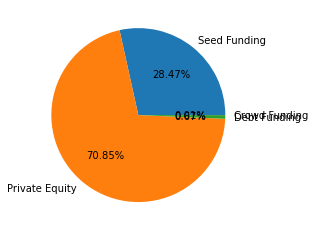

Private Equity 70.85 
Seed Funding 28.47 
Debt Funding 0.67 
Crowd Funding 0.01 


In [6]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("startup_funding.csv")

df = data.copy()

investment =df["InvestmentType"].value_counts()

amount = df["AmountInUSD"].str.replace(',','')
amount.fillna(0, inplace = True)

df["InvestmentType"] = df["InvestmentType"].replace(["SeedFunding",'PrivateEquity', 'Crowd funding'], ["Seed Funding",'Private Equity', 'Crowd Funding'])

investments = df["InvestmentType"]

df1 = pd.DataFrame(investments)
df2 = pd.DataFrame(amount)
df2["InvestmentType"] = investments

invest = df['InvestmentType'].value_counts().index

invest=np.array(invest)
amt = np.array(amount, dtype = int)

arr = []

for i in invest:
    ind = np.where(investments == i)
    sums = amt[ind].sum()
    arr.append([i, sums])

    
arr.sort(reverse = True)

invt = []
usd = []
for i in arr:
    invt.append(i[0])
for i in arr:
    usd.append(i[1])
    
plt.pie(usd, autopct = '%.2f%%', labels = invt)
plt.show()

arr2 = []
for i in range(len(usd)):
    per = usd[i] / sum(usd) * 100
    arr2.append([invt[i], format(per, '.2f')])

arr2[0],arr2[1] = arr2[1], arr2[0]
for i in arr2:
    for j in i:
        print(j, end= ' ')
    print()
                

# Number of Fundings

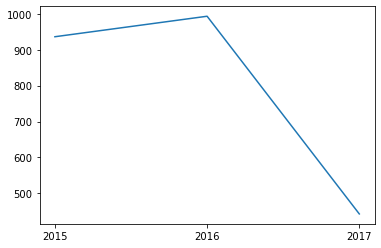

2015   936
2016   993
2017   443


In [7]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('startup_funding.csv')
a = df['Date'].str[-4:]
ans = a.value_counts().sort_index()
x = ans.index
y = ans.values
plt.plot(x,y)
plt.show()
for i in range(len(x)):
    print(int(x[i])," ",y[i])

# Top Indian Cities

In [8]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("startup_funding.csv")

df = data.copy()
counts = df['CityLocation'].value_counts()
df["CityLocation"] = df["CityLocation"].replace(['Delhi', 'bangalore','Pune / US','Bangalore / SFO','New Delhi / US','Bangalore/ Bangkok','Mumbai / NY','New Delhi/ Houston','Bangalore / Palo Alto','Gurgaon / SFO','Mumbai / UK','Noida / Singapore','Mumbai / Global','Pune/Seattle','Pune / Singapore','Chennai/ Singapore','Hyderabad/USA','New Delhi / California','Bangalore / USA','Bangalore / San Mateo','Pune / Dubai'],["New Delhi", 'Bangalore','Pune','Bangalore','New Delhi', 'Bangalore','Mumbai','New Delhi','Bangalore','Gurgaon','Mumbai','Noida','Mumbai','Pune','Pune','Chennai','Hyderabad','New Delhi','Bangalore','Bangalore','Pune'])

counts = df["CityLocation"].value_counts()
city = counts.index
value = counts.values

for i in range(10):
    print(city[i], value[i])


Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [9]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file = pd.read_csv('startup_funding.csv')
d = file.copy()
c = 0
a = {}
b = {}
#city = d["CityLocation"].replace(['Delhi', 'bangalore','Pune / US','Bangalore / SFO','New Delhi / US','Bangalore/ Bangkok','Mumbai / NY','New Delhi/ Houston','Bangalore / Palo Alto','Gurgaon / SFO','Mumbai / UK','Noida / Singapore','Mumbai / Global','Pune/Seattle','Pune / Singapore','Chennai/ Singapore','Hyderabad/USA','New Delhi / California','Bangalore / USA','Bangalore / San Mateo','Pune / Dubai'],["New Delhi", 'Bangalore','Pune','Bangalore','New Delhi', 'Bangalore','Mumbai','New Delhi','Bangalore','Gurgaon','Mumbai','Noida','Mumbai','Pune','Pune','Chennai','Hyderabad','New Delhi','Bangalore','Bangalore','Pune'])
city = d['CityLocation']
city.dropna(inplace = True)

for ele in city:
    s = ele.split('/')
    p = len(s)
    ele = s[0]
    if ele[0].islower():
        ele = ele[0].upper() + ele[1:]
    a[ele] = a.get(ele,0) + p
b = dict(sorted(a.items(), key=lambda item: item[1] , reverse = True))
for ele in b:
    if c == 10:
        break
    print(ele , b[ele])
    c += 1

Bangalore 632
Mumbai 446
New Delhi 383
Gurgaon 240
Pune 86
Hyderabad 78
Noida 78
Chennai 68
Ahmedabad 35
Jaipur 25


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('startup_funding.csv')
city = data['CityLocation']
city.dropna(inplace = True)

s = city.str.split('/')

city = []
for i in s:
        i[0] = i[0].strip()
        if i[0] == 'Delhi':
            i[0] = 'New Delhi'
            city.append(i[0])
        elif i[0] == 'bangalore':
            i[0] ='Bangalore'
            city.append(i[0])
        else:
            city.append(i[0])

df = pd.DataFrame(city)
s = df[0].value_counts()
s

Bangalore     635
Mumbai        449
New Delhi     389
Gurgaon       241
Pune           91
Noida          79
Hyderabad      77
Chennai        67
Ahmedabad      35
Jaipur         25
Kolkata        19
Chandigarh     10
Indore          9
Vadodara        9
Goa             8
Singapore       5
Kanpur          4
Coimbatore      3
USA             2
Gwalior         2
Bhopal          2
Udupi           2
Kochi           2
Trivandrum      2
Agra            2
Siliguri        2
US              2
Jodhpur         1
Boston          1
Nagpur          1
Belgaum         1
New York        1
Seattle         1
India           1
Udaipur         1
Varanasi        1
Missourie       1
London          1
SFO             1
Lucknow         1
Panaji          1
Kozhikode       1
Kerala          1
Hubli           1
Surat           1
Karur           1
Dallas          1
Name: 0, dtype: int64

# Top Industries

In [11]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('startup_funding.csv')


df = data.copy()
df = df.dropna(subset = ['IndustryVertical'])
industry = df["IndustryVertical"].replace(['ECommerce','eCommerce'],['Ecommerce','Ecommerce'])

amount = df["AmountInUSD"].str.replace(',','')
amount.fillna(0, inplace = True)

industry = np.array(industry)
amount = np.array(amount, dtype = np.int64)

    
unique = np.unique(industry)
arr = []
for i in unique:
    index = np.where(industry == i)
    sums = amount[index].sum()
    arr.append([i, sums])
    
arr = np.array(arr)

ind = []
cost= []
for i in arr:
    ind.append(i[0])
for i in arr:
    cost.append(i[1])
    
df1 = pd.DataFrame(ind, columns = ["a"])
df1["b"] = cost
df2 = df1.groupby('a')['b'].sort_values(ascending=False)


AttributeError: 'SeriesGroupBy' object has no attribute 'sort_values'

In [12]:
    
unique = np.unique(industry)
arr = []
for i in unique:
    index = np.where(industry == i)
    sums = amount[index].sum()
    arr.append([i, sums])
    
arr = np.array(arr)
arr = arr[arr[:,1].argsort()[::-1]]

ind = []
cost= []

for i in arr:
    ind.append(i[0])
for i in arr:
    cost.append(i[1])
    
cost = np.array(cost,dtype = np.int64)

    
for i in range(5):
    per = (cost[i] / sum(cost)) * 100
    print(ind[i], format(per, '.2f'))

Healthcare 0.57
User Engagment & Analytics platform 0.06
Beauty & Wellness Products e-tailer 0.06
Industrial Tools Marketplace 0.05
Education 0.53


In [13]:
# correct one
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('startup_funding.csv')


df = data.copy()
df = df.dropna(subset = ['IndustryVertical'])
industry = df["IndustryVertical"].replace(['ECommerce','eCommerce','ecommerce'],['Ecommerce','Ecommerce','Ecommerce'])

df['AmountInUSD'] = df["AmountInUSD"].str.replace(',','')
df["AmountInUSD"] = df['AmountInUSD'].astype(float)
df['AmountInUSD'].fillna(0,inplace = True)
df['AmountInUSD'] = pd.to_numeric(df["AmountInUSD"])
ind = df.groupby(industry)['AmountInUSD'].sum().sort_values(ascending =False)[:5]

industries = ind.index
amount = ind.values
per = np.true_divide(amount, amount.sum()) * 100
for i in range(len(ind)):
    print(industries[i],format(per[i],'.2f'))

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [14]:
import pandas as pd
import numpy as np
df_start=pd.read_csv('startup_funding.csv',encoding='utf-8')
## Correcting the InvestmentType
#industry = df["IndustryVertical"].replace(['ECommerce','eCommerce','ecommerce'],['Ecommerce','Ecommerce','Ecommerce'])

df_start['IndustryVertical'].replace('eCommerce','Ecommerce',inplace=True)
#df_start['IndustryVertical'].replace('E-Commerce & M-Commerce platform','Ecommerce',inplace=True)
df_start['IndustryVertical'].replace('ECommerce','Ecommerce',inplace=True)
#df_start['IndustryVertical'].replace('Ecommerce Marketplace ','Ecommerce',inplace=True)
#df_start['IndustryVertical'].replace('Ecommerce Logistics','Ecommerce',inplace=True)
df_start['IndustryVertical'].replace('ecommerce ','Ecommerce',inplace=True)

##df_start['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
## Converting  "AmountInUSD" into numeric format
df_start["AmountInUSD"] = df_start["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
df_start["AmountInUSD"] = pd.to_numeric(df_start["AmountInUSD"])
invest_amount=df_start.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending=False)[0:5]
invest=invest_amount.index
amountInvest=invest_amount.values
peramount=np.true_divide(amountInvest, amountInvest.sum())*100
for i in range(len(invest)):
    print(invest[i],format(peramount[i],'.2f'))

Ecommerce 40.52
Consumer Internet 35.96
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


# Top Investor

In [15]:
# Open and read data file as specified in the question
# Print the required output in given format
## c0rrect code
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('startup_funding.csv')

#[OYOfit]

df = data.copy()
##a = df["InvestorsName"].value_counts()
a = df["InvestorsName"].str.split(',')
arr = []
a = list(a)
arr = []
for i in a:
    if type(i) != float or type(i) == list:
        for j in i:
            arr.append(j)
    else:
        arr.append(i)
        


df2 = pd.DataFrame(arr)
a = df2[0]
b = a.str.lstrip()
c = b.value_counts()[:1]
d= c.index
e= c.values

for i in range(len(d)):
    print(d[i],e[i])


Sequoia Capital 64


In [16]:
import pandas as pd
import numpy as np
import collections

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df.InvestorsName.fillna("",inplace = True)
investors = df.InvestorsName

investors_name = []
for i in investors:
    if i != "":
        temp = i.split(",")
        for j in temp:
            investors_name.append(j.strip())
dct = {}
for i in investors_name:
    dct[i] = dct.get(i,0) + 1
    

#for i in dct:
#    print(i, dct[i])
for i in dct:
    if dct[i] == max(dct.values()):
        print(i, dct[i])

Sequoia Capital 64


In [17]:
# Open and read data file as specified in the question
# Print the required output in given format
import numpy as np
import pandas as pd
def f(x):
    for i in x.split(','):
        #print(type(i))
        if i != '':
            #print(i)
            i = i.strip()
            d[i]=d.get(i,0)+1
    #return i
df=pd.read_csv('startup_funding.csv')
df.InvestorsName.fillna("",inplace = True)

#df.dropna(inplace=True,subset=['InvestorsName'])
#df.dropna(inplace=True,subset=['AmountInUSD'])
d={}
df['InvestorsName'].apply(f)
max=0
maxinvestor=''
for i in d:
    if(d[i]>max):
        maxinvestor=i
        max=d[i]
print(maxinvestor,int(max))


Sequoia Capital 64


# Top Indian Startup

In [18]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('startup_funding.csv')

#[OYOfit]
df = data.copy()
df["StartupName"].dropna(inplace=True)
df.loc[df['StartupName'].str.contains('oyo',case = False),'StartupName'] = 'Oyo'    ## COncept to replace all strings that contain a specific substring.

df.loc[df['StartupName'].str.contains('flipkart',case = False),'StartupName'] = 'Flipkart'
df.loc[df['StartupName'].str.contains('ola',case = False),'StartupName'] = 'Ola'
df.loc[df['StartupName'].str.contains('paytm',case = False),'StartupName'] = 'Paytm'

df["AmountInUSD"] =df["AmountInUSD"].str.replace(',','')
df["AmountInUSD"] = df["AmountInUSD"].astype(float)
df["AmountInUSD"].fillna(0, inplace = True)
df["AmountInUSD"] = pd.to_numeric(df["AmountInUSD"])
startups = df.groupby("StartupName")["AmountInUSD"].sum().sort_values(ascending = False)[:5]

start = startups.index
amt = startups.values
for i in start:
    print(i)

#[Ola, Flipkart, Oyo, Paytm]

Paytm
Flipkart
Ola
Snapdeal
Oyo


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('startup_funding.csv',encoding='utf-8')
df.dropna(subset=['StartupName'],inplace=True)
df.loc[df['StartupName'].str.contains('oyo',case = False),'StartupName'] = 'Oyo'  
## COncept to replace all strings that contain a specific substring.
df.loc[df['StartupName'].str.contains('flipkart',case = False),'StartupName'] = 'Flipkart'
df.loc[df['StartupName'].str.contains('ola',case = False),'StartupName'] = 'Ola'
df.loc[df['StartupName'].str.contains('paytm',case = False),'StartupName'] = 'Paytm'



df["AmountInUSD"] = df["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))

# #df_start["AmountInUSD"] = pd.to_numeric(df_start["AmountInUSD"])

industry_amount=df.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending=False)[0:5]

industry=industry_amount.index

amount=industry_amount.values

perAmount=np.true_divide(amount, amount.sum())*100
for i in range(len(industry)):

    print(industry[i])

Paytm
Flipkart
Ola
Snapdeal
Oyo


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_start=pd.read_csv('startup_funding.csv',encoding='utf-8')
df_start.dropna(subset=['StartupName'],inplace=True)
df_start.loc[df['StartupName'].str.contains('oyo',case = False),'StartupName'] = 'Oyo'  
## COncept to replace all strings that contain a specific substring.
df_start.loc[df['StartupName'].str.contains('flipkart',case = False),'StartupName'] = 'Flipkart'
df_start.loc[df['StartupName'].str.contains('ola',case = False),'StartupName'] = 'Ola'
df_start.loc[df['StartupName'].str.contains('paytm',case = False),'StartupName'] = 'Paytm'



df_start["AmountInUSD"] = df_start["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))

# #df_start["AmountInUSD"] = pd.to_numeric(df_start["AmountInUSD"])

industry_amount=df_start.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending=False)[0:5]

industry=industry_amount.index

amount=industry_amount.values

perAmount=np.true_divide(amount, amount.sum())*100
for i in range(len(industry)):

    print(industry[i])

Paytm
Flipkart
Ola
Snapdeal
Oyo
